# Example of PCA on MNIST
Fig. 12.3 of PRML, Fig. 16.5 of Deep Learning

Tatsuo Okubo

2025/07/16

In [1]:
import ipywidgets as widgets
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import Subset

In [2]:
train_ds = MNIST(root="../data", train=True, download=False,
                 transform=transforms.ToTensor())

mask = train_ds.targets == 3
X  = train_ds.data[mask].numpy()

In [3]:
N = X.shape[0]  # number of samples
print(f"Number of samples: {N}")

Number of samples: 6131


In [4]:
X = X.reshape(N, -1)
X.shape  # flatten to [N, 784]

(6131, 784)

In [5]:
x_bar = np.mean(X, axis=0)  # mean vector
X_demean =  X - x_bar

In [6]:
S = (1.0 / N) * X_demean.T @ X_demean  # data covariance matrix
S.shape

(784, 784)

In [7]:
lambdas, U = np.linalg.eigh(S)
idx = lambdas.argsort()[::-1]
lambdas = lambdas[idx]
U = U[:, idx]

In [8]:
J = np.sum(lambdas) - np.cumsum(lambdas)

# Plot the eigenvectors

In [9]:
cmap_blue = LinearSegmentedColormap.from_list("white_blue", ["white", "blue"], N=256)

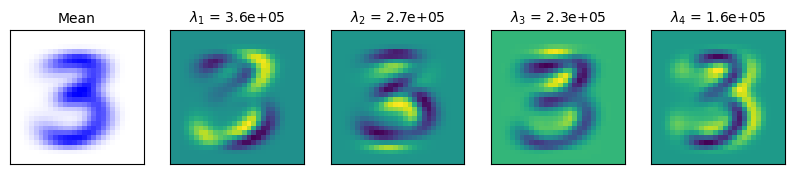

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))
ax[0].imshow(x_bar.reshape(28, 28), cmap=cmap_blue)
ax[1].imshow(U[:, 0].reshape(28, 28))
ax[2].imshow(U[:, 1].reshape(28, 28))
ax[3].imshow(U[:, 2].reshape(28, 28))
ax[4].imshow(-U[:, 3].reshape(28, 28))

for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if i == 0:
        ax[i].set_title("Mean", fontsize=10)
    else:
        ax[i].set_title(f"$\\lambda_{i}$ = {lambdas[i-1]:.1e}", fontsize=10)

plt.show()

# Plot the eigenvalues

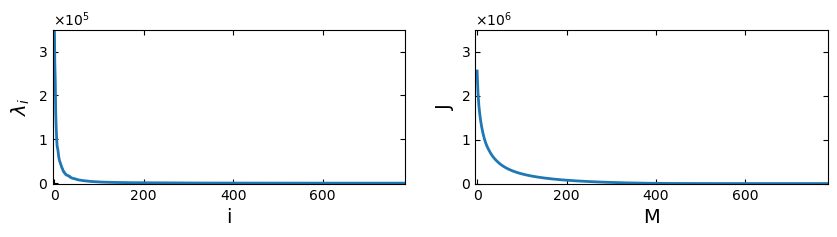

In [11]:
# Fig. 12. 5 of PRML, Fig. 16.4 of Deep Learning
fig, ax = plt.subplots(1, 2, figsize=(10, 2))
ax[0].plot(lambdas, lw=2)
ax[0].set_xlim(-4, len(lambdas))
ax[0].set_ylim(-1000, 3.5e5)
ax[0].set_xticks(np.arange(0, len(lambdas), 200))
ax[0].set_yticks(np.arange(0, 3.5e5, 1e5))
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[0].set_xlabel('i', fontsize=14)
ax[0].set_ylabel(r'$\lambda_i$', fontsize=14)

ax[1].plot(J, lw=2)
ax[1].set_xlim(-4, len(lambdas))
ax[1].set_ylim(-1000, 3.5e6)
ax[1].set_xticks(np.arange(0, len(lambdas), 200))
ax[1].set_yticks(np.arange(0, 3.5e6, 1e6))
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax[1].set_xlabel('M', fontsize=14)
ax[1].set_ylabel('J', fontsize=14)
plt.show()

# Reconstruction example

In [12]:
n = 5

In [13]:
def reconstruct(M):
    """Reconstruct the image using the first M principal components.
    Args:
        M (int): Number of principal components to use for reconstruction.
    Returns:
        np.ndarray: Reconstructed image.
    """
    x_tilde = x_bar.copy()
    for i in range(M):  # not an efficient implementation, just for compatibility with the textbook equation
        x_tilde += (X[n] @ U[:, i] - x_bar @ U[:, i]) * U[:, i]  # eq (12.20)
    return x_tilde


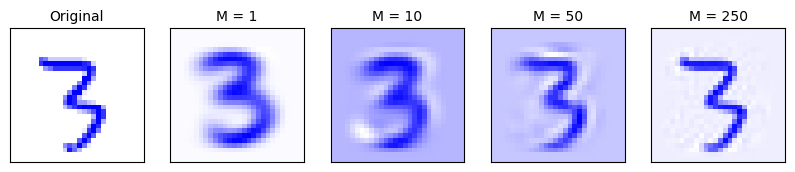

In [14]:
M_list = [1, 10, 50, 250]

fig, ax = plt.subplots(1, 5, figsize=(10, 2))
ax[0].imshow(X[n].reshape(28, 28), cmap=cmap_blue)
ax[0].set_title("Original", fontsize=10)
ax[0].set_xticks([])
ax[0].set_yticks([])

for i, m in enumerate(M_list):
    x_tilde = reconstruct(m)
    ax[i + 1].imshow(x_tilde.reshape(28, 28), cmap=cmap_blue)
    ax[i + 1].set_title(f"M = {m}", fontsize=10)
    ax[i + 1].set_xticks([])
    ax[i + 1].set_yticks([])
plt.show()

In [15]:
def show_reconstruction(M: int):
    x_orig = X[n].reshape(28, 28)
    x_tilde = reconstruct(M).reshape(28, 28)

    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].imshow(x_orig, cmap=cmap_blue)
    ax[0].set_title("Original")
    ax[0].axis('off')

    ax[1].imshow(x_tilde, cmap=cmap_blue)
    ax[1].set_title(f"Reconstructed\nM = {M}")
    ax[1].axis('off')

    plt.show()

In [16]:
max_pcs = U.shape[1]

pc_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=max_pcs,
    step=1,
    description='# of PCs:',
    continuous_update=False
)

In [17]:
display(widgets.interact(show_reconstruction, M=pc_slider))

interactive(children=(IntSlider(value=1, continuous_update=False, description='# of PCs:', max=784, min=1), Ou…

<function __main__.show_reconstruction(M: int)>